# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Ghifari
- **Email:** enters_beans.0j@icloud.com
- **ID Dicoding:** ghifari_m_T5M6

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara secara keseluruhan berubah dari tahun ke tahun
- Wilayah manakah yang memegang rekor untuk polusi paling tinggi?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# read all csv in data folder
aotizhongxin_df = pd.read_csv("Data/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
changping_df = pd.read_csv("Data/PRSA_Data_Changping_20130301-20170228.csv")
dingling_df = pd.read_csv("Data/PRSA_Data_Dingling_20130301-20170228.csv")
dongsi_df = pd.read_csv("Data/PRSA_Data_Dongsi_20130301-20170228.csv")
guanyuan_df = pd.read_csv("Data/PRSA_Data_Guanyuan_20130301-20170228.csv")
gucheng_df = pd.read_csv("Data/PRSA_Data_Gucheng_20130301-20170228.csv")
huairou_df = pd.read_csv("Data/PRSA_Data_Huairou_20130301-20170228.csv")
nongzhanguan_df = pd.read_csv("Data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
shunyi_df = pd.read_csv("Data/PRSA_Data_Shunyi_20130301-20170228.csv")
tiantan_df = pd.read_csv("Data/PRSA_Data_Tiantan_20130301-20170228.csv")
wanliu_df = pd.read_csv("Data/PRSA_Data_Wanliu_20130301-20170228.csv")
qanshouxigong_df = pd.read_csv("Data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

# merge csv files 
df = pd.concat([aotizhongxin_df, changping_df, dingling_df, dongsi_df, guanyuan_df, gucheng_df, huairou_df, nongzhanguan_df, shunyi_df, tiantan_df, wanliu_df, qanshouxigong_df], ignore_index=True)

# add datetime column to dataframe
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


### Assessing Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     412029 non-null  float64       
 6   PM10      414319 non-null  float64       
 7   SO2       411747 non-null  float64       
 8   NO2       408652 non-null  float64       
 9   CO        400067 non-null  float64       
 10  O3        407491 non-null  float64       
 11  TEMP      420370 non-null  float64       
 12  PRES      420375 non-null  float64       
 13  DEWP      420365 non-null  float64       
 14  RAIN      420378 non-null  float64       
 15  wd        418946 non-null  object        
 16  WSPM      420450 non-null  float64    

In [4]:
# check for empty values
df.isna().sum()

No              0
year            0
month           0
day             0
hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
datetime        0
dtype: int64

In [5]:
# check for duplicated values
print("Duplicated Data: ", df.duplicated().sum())

Duplicated Data:  0


In [6]:
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000,420768
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000,2017-02-28 23:00:00
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386,NaN


In [7]:
df.isna().sum()

No              0
year            0
month           0
day             0
hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
datetime        0
dtype: int64

#### Assessment Result
1. There is no data duplication
2. There is a lot of missing values:
    - PM2.5 (float)     : 8739
    - PM10 (float)      : 6449
    - SO2 (float)       : 9021
    - NO2 (float)       : 12116
    - CO (float)        : 20701
    - O3 (float)        : 13277
    - TEMP (float)      : 398
    - PRES (float)      : 393
    - DEWP (float)      : 403
    - RAIN (float)      : 390
    - wd (string)       : 1822
    - WSPM (float)      : 318
3. Abnormaly large maximum values of : 
    - PM10  : 999, possibly an instrument error or an isolated incident
    - SO2   : 500, possibly an instrument error or an isolated incident
    - O3    : 1071, possibly an instrument error or an isolated incident

### Cleaning Data



In [8]:
# look for most frequent value for wd
df.wd.value_counts()

wd
NE     43335
ENE    34142
NW     32600
N      30869
E      29752
SW     28756
NNE    28232
NNW    25326
WNW    24375
ESE    24220
SSW    22563
SE     20074
WSW    20040
S      19405
SSE    17694
W      17563
Name: count, dtype: int64

In [9]:
# fill missing value of wd with imputation
df['wd'].fillna(value='NE', inplace=True)
df.isna().sum()

No              0
year            0
month           0
day             0
hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd              0
WSPM          318
station         0
datetime        0
dtype: int64

In [10]:
# fill missing values of the measurements with interpolation
df['PM2.5'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['PM10'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['SO2'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['NO2'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['CO'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['O3'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['TEMP'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['PRES'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['DEWP'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['RAIN'].interpolate(method='linear', limit_direction='forward', inplace=True)
df['WSPM'].interpolate(method='linear', limit_direction='forward', inplace=True)
df.isna().sum()

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
df.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45157,NaN,35064,NaN
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,NaN,1.730034,NaN,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN,2017-02-28 23:00:00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     420768 non-null  float64       
 6   PM10      420768 non-null  float64       
 7   SO2       420768 non-null  float64       
 8   NO2       420768 non-null  float64       
 9   CO        420768 non-null  float64       
 10  O3        420768 non-null  float64       
 11  TEMP      420768 non-null  float64       
 12  PRES      420768 non-null  float64       
 13  DEWP      420768 non-null  float64       
 14  RAIN      420768 non-null  float64       
 15  wd        420768 non-null  object        
 16  WSPM      420768 non-null  float64    

In [13]:
df.groupby(by='station').agg({
  "PM2.5": ["mean", "max", "min"],
  "PM10": ["mean", "max", "min"],
  "SO2": ["mean", "max", "min"],
  "NO2": ["mean", "max", "min"],
  "CO": ["mean", "max", "min"],
  "O3": ["mean", "max", "min"]
})

PM2.5                    PM10                    SO2  \
                    mean    max  min        mean    max  min       mean   
station                                                                   
Aotizhongxin   82.540623  898.0  3.0  110.210033  984.0  2.0  17.459251   
Changping      70.986438  882.0  2.0   94.788575  999.0  2.0  14.943066   
Dingling       66.845557  881.0  3.0   84.113713  905.0  2.0  11.797849   
Dongsi         86.144243  737.0  3.0  110.347617  955.0  2.0  18.506142   
Guanyuan       82.897522  680.0  2.0  109.372349  999.0  2.0  17.609312   
Gucheng        84.074802  770.0  2.0  119.261567  994.0  2.0  15.705821   
Huairou        69.501747  762.0  2.0   92.422670  993.0  2.0  12.446681   
Nongzhanguan   85.079472  844.0  2.0  109.384022  995.0  2.0  18.760102   
Shunyi         79.437962  941.0  2.0   99.271936  999.0  2.0  13.445971   
Tiantan        82.033097  821.0  3.0  106.537076  988.0  2.0  14.510018   
Wanliu         83.467612  957.0  2.0  110.707858  951.0  2.0  18.409514   
Wanshouxigong  85.067548  999.0  3.0  112.505795  961.0  2.0  17.363354   

                                    NO2                          CO           \
                 max     min       mean    max     min         mean      max   
station                                                                        
Aotizhongxin   341.0  0.2856  59.074106  290.0  2.0000  1264.692405  10000.0   
Changping      310.0  0.2856  44.206153  226.0  1.8477  1156.990246  10000.0   
Dingling       156.0  0.2856  27.304331  205.0  1.0265   925.111838  10000.0   
Dongsi         300.0  0.2856  53.953078  258.0  2.0000  1331.913045  10000.0   
Guanyuan       293.0  1.0000  58.139298  270.0  2.0000  1258.327045  10000.0   
Gucheng        500.0  0.2856  55.836004  276.0  2.0000  1338.100060  10000.0   
Huairou        315.0  0.2856  32.077275  231.0  1.0265  1019.671871  10000.0   
Nongzhanguan   257.0  0.5712  58.095053  273.0  2.0000  1327.767611  10000.0   
Shunyi         239.0  0.2856  44.094695  258.0  2.0000  1197.904660  10000.0   
Tiantan        273.0  0.5712  53.258828  241.0  2.0000  1305.333262  10000.0   
Wanliu         282.0  0.2856  65.668418  264.0  1.6424  1328.761180  10000.0   
Wanshouxigong  411.0  0.2856  55.495402  251.0  2.0000  1373.618569   9800.0   

                             O3                     
                 min       mean        max     min  
station                                             
Aotizhongxin   100.0  55.328626   423.0000  0.2142  
Changping      100.0  57.976253   429.0000  0.2142  
Dingling       100.0  70.530792   500.0000  0.2142  
Dongsi         100.0  57.700357  1071.0000  0.6426  
Guanyuan       100.0  54.817142   415.0000  0.2142  
Gucheng        100.0  58.000001   450.0000  0.2142  
Huairou        100.0  60.872173   444.0000  0.2142  
Nongzhanguan   100.0  58.432876   390.0000  0.2142  
Shunyi         100.0  54.218810   351.7164  0.2142  
Tiantan        100.0  56.148077   674.0000  0.4284  
Wanliu         100.0  46.909375   364.0000  0.2142  
Wanshouxigong  100.0  55.919979   358.0000  0.2142

In [14]:
df.corr(numeric_only=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
No,1.000000,9.695331e-01,4.318051e-02,1.776442e-02,6.838683e-04,-0.024719,-0.047232,-0.227029,-0.047090,0.019026,-0.040679,-0.122671,0.188618,-0.102117,0.004812,0.054354
year,0.969533,1.000000e+00,-2.020099e-01,-5.569082e-03,-2.115260e-15,-0.026070,-0.039717,-0.170455,-0.055492,0.007489,-0.013782,-0.152312,0.187214,-0.165189,0.000894,0.087666
month,0.043181,-2.020099e-01,1.000000e+00,1.052232e-02,-1.905981e-16,0.006540,-0.029467,-0.214820,0.036341,0.046000,-0.105752,0.132502,-0.013835,0.266779,0.016136,-0.139920
day,0.017764,-5.569082e-03,1.052232e-02,1.000000e+00,1.013388e-17,0.005445,0.027416,-0.001980,0.012384,-0.015630,-0.000510,0.014219,0.021971,0.022988,-0.003716,-0.011426
hour,0.000684,-2.115260e-15,-1.905981e-16,1.013388e-17,1.000000e+00,0.011129,0.049566,0.028943,-0.001783,-0.031367,0.277433,0.142173,-0.038464,-0.011966,0.012371,0.140396
PM2.5,-0.024719,-2.606991e-02,6.539506e-03,5.445498e-03,1.112889e-02,1.000000,0.878874,0.478223,0.664306,0.780165,-0.149508,-0.131607,0.019862,0.113045,-0.014452,-0.271425
PM10,-0.047232,-3.971735e-02,-2.946699e-02,2.741647e-02,4.956631e-02,0.878874,1.000000,0.460572,0.645583,0.691887,-0.110443,-0.096078,-0.018375,0.067674,-0.026505,-0.178200
SO2,-0.227029,-1.704546e-01,-2.148197e-01,-1.980077e-03,2.894252e-02,0.478223,0.460572,1.000000,0.495826,0.522678,-0.165311,-0.320237,0.221235,-0.266121,-0.040028,-0.108536
NO2,-0.047090,-5.549204e-02,3.634103e-02,1.238374e-02,-1.783158e-03,0.664306,0.645583,0.495826,1.000000,0.694036,-0.465912,-0.277279,0.176652,-0.032569,-0.043665,-0.395699
CO,0.019026,7.488632e-03,4.599987e-02,-1.562982e-02,-3.136714e-02,0.780165,0.691887,0.522678,0.694036,1.000000,-0.306979,-0.324057,0.188045,-0.060315,-0.013281,-0.290413


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana kualitas udara secara keseluruhan berubah dari tahun ke tahun?

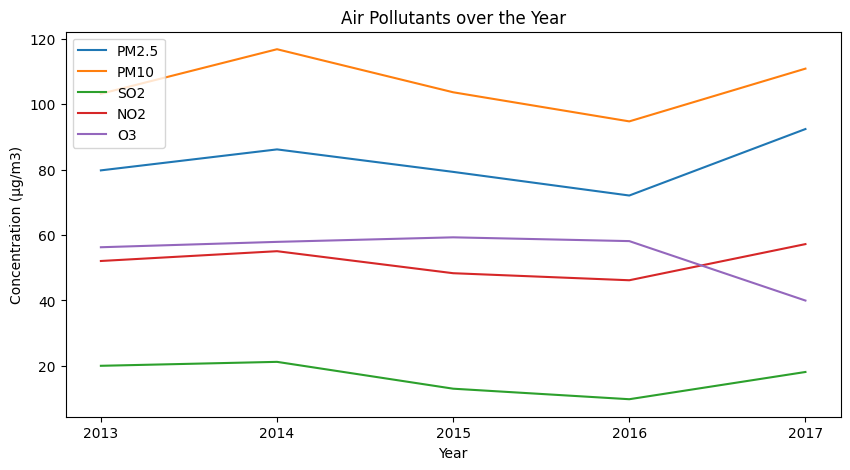

In [15]:

annual_df = df.resample(rule='Y', on='datetime').agg({
  "PM2.5": "mean",
  "PM10": "mean",
  "SO2": "mean",
  "NO2": "mean",
  "CO": "mean",
  "O3": "mean"
})

annual_df.index = annual_df.index.strftime('%Y')

plt.figure(figsize=(10,5))
plt.plot(annual_df.index, annual_df['PM2.5'], label='PM2.5')
plt.plot(annual_df.index, annual_df['PM10'], label='PM10')
plt.plot(annual_df.index, annual_df['SO2'], label='SO2')
plt.plot(annual_df.index, annual_df['NO2'], label='NO2')
plt.plot(annual_df.index, annual_df['O3'], label='O3')
plt.xlabel("Year")
plt.ylabel("Concentration (μg/m3)")
plt.title("Air Pollutants over the Year")
plt.legend()

### Pertanyaan 2: Wilayah manakah yang paling berpolusi?

/var/folders/3n/d3zngy3s6cb6n2xjvwnqg2vr0000gn/T/ipykernel_5335/516407811.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


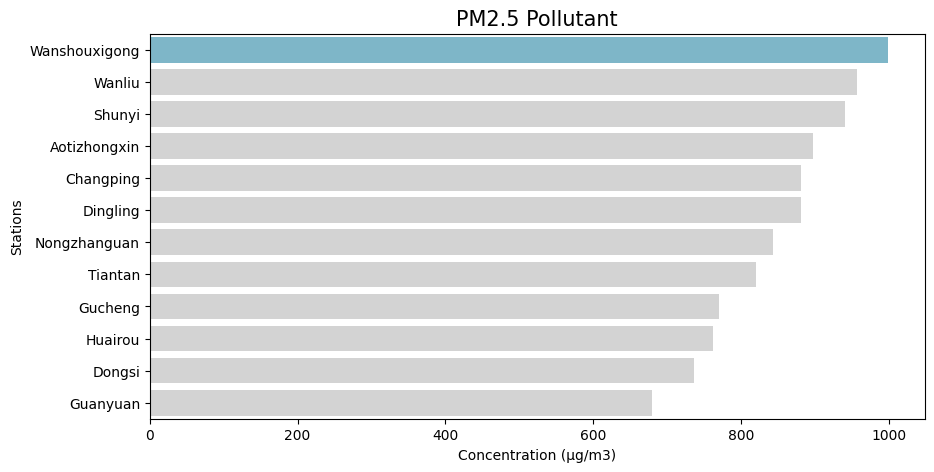

In [16]:
bystation_df = df.groupby(by='station').agg({
  "PM2.5": "max",
  "PM10": "max",
  "SO2": "max",
  "NO2": "max",
  "CO": "max",
  "O3": "max"
})
plt.figure(figsize=(10, 5))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
  x="PM2.5", 
  y="station",
  data=bystation_df.sort_values(by="PM2.5", ascending=False),
  palette=colors
)
plt.title("PM2.5 Pollutant", loc="center", fontsize=15)
plt.ylabel("Stations")
plt.xlabel("Concentration (μg/m3)")
plt.show()

#### Wilayah Wanshouxiogong memegang rekor untuk PM2.5 yang paling tinggi

/var/folders/3n/d3zngy3s6cb6n2xjvwnqg2vr0000gn/T/ipykernel_5335/249090633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


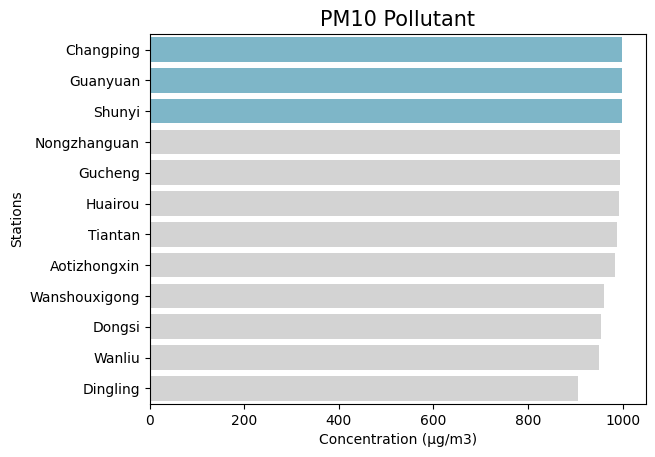

In [17]:
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
  x="PM10", 
  y="station",
  data=bystation_df.sort_values(by="PM10", ascending=False),
  palette=colors
)
plt.title("PM10 Pollutant", loc="center", fontsize=15)
plt.ylabel("Stations")
plt.xlabel("Concentration (μg/m3)")
plt.show()

#### Wilayah Changping, Guanyuan, dan Shunyi memegang rekor untuk PM10 yang paling tinggi

/var/folders/3n/d3zngy3s6cb6n2xjvwnqg2vr0000gn/T/ipykernel_5335/1787600561.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


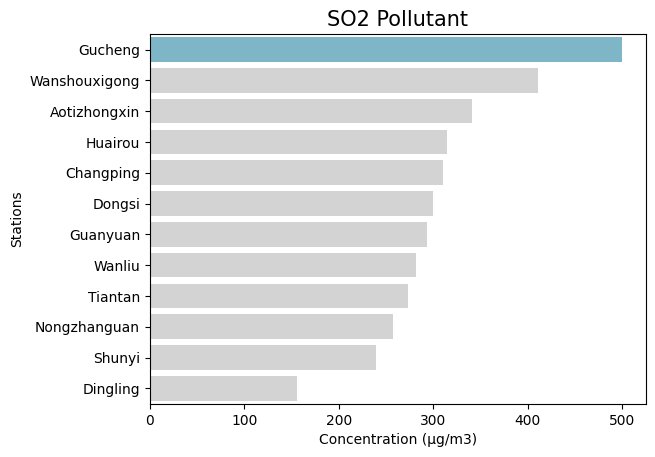

In [18]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
  x="SO2", 
  y="station",
  data=bystation_df.sort_values(by="SO2", ascending=False),
  palette=colors
)
plt.title("SO2 Pollutant", loc="center", fontsize=15)
plt.ylabel("Stations")
plt.xlabel("Concentration (μg/m3)")
plt.show()

#### Wilayah Gucheng memegang rekor untuk SO2 yang paling tinggi

/var/folders/3n/d3zngy3s6cb6n2xjvwnqg2vr0000gn/T/ipykernel_5335/3246513626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


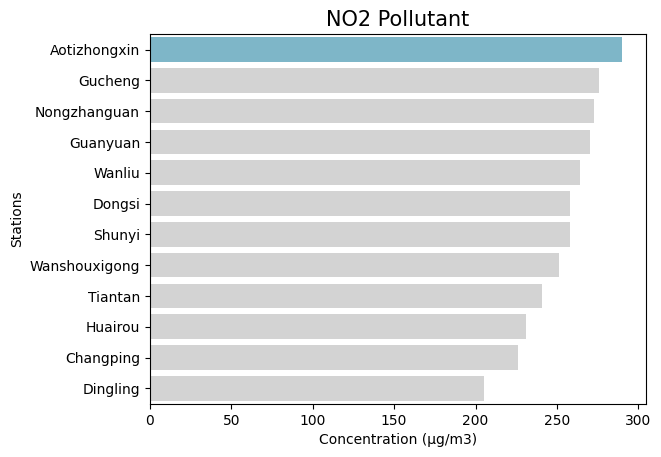

In [19]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
  x="NO2", 
  y="station",
  data=bystation_df.sort_values(by="NO2", ascending=False),
  palette=colors
)
plt.title("NO2 Pollutant", loc="center", fontsize=15)
plt.ylabel("Stations")
plt.xlabel("Concentration (μg/m3)")
plt.show()

#### Wilayah Aotizhongxin memegang rekor untuk NO2 yang paling tinggi

/var/folders/3n/d3zngy3s6cb6n2xjvwnqg2vr0000gn/T/ipykernel_5335/879297116.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


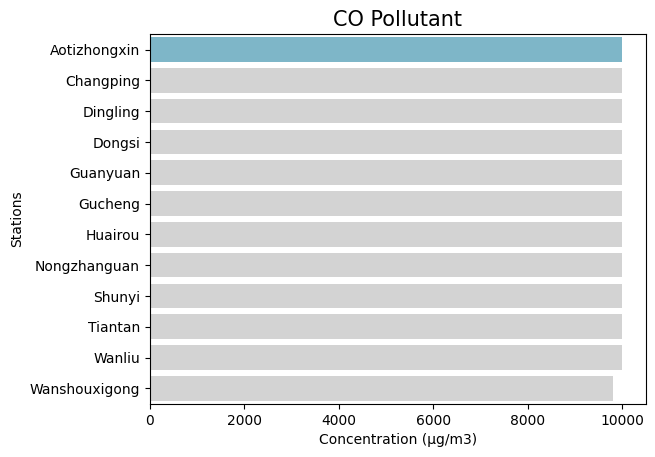

In [20]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
  x="CO", 
  y="station",
  data=bystation_df.sort_values(by="CO", ascending=False),
  palette=colors
)
plt.title("CO Pollutant", loc="center", fontsize=15)
plt.ylabel("Stations")
plt.xlabel("Concentration (μg/m3)")
plt.show()

#### Semua wilayah kecuali Wanshouxiogong pernah melampaui batas pengukuran CO

/var/folders/3n/d3zngy3s6cb6n2xjvwnqg2vr0000gn/T/ipykernel_5335/1229473170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


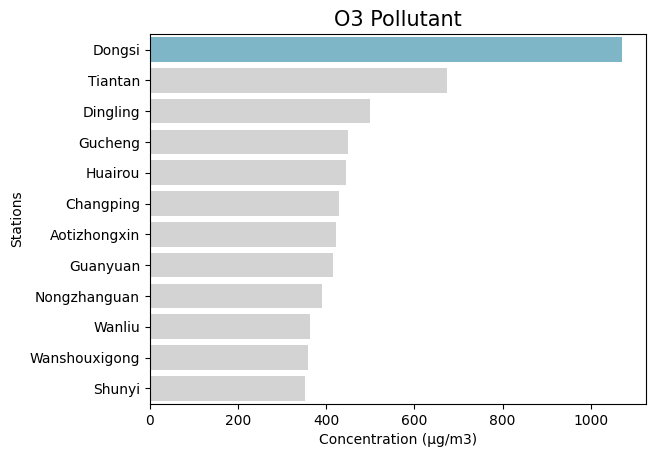

In [21]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
  x="O3", 
  y="station",
  data=bystation_df.sort_values(by="O3", ascending=False),
  palette=colors
)
plt.title("O3 Pollutant", loc="center", fontsize=15)
plt.ylabel("Stations")
plt.xlabel("Concentration (μg/m3)")
plt.show()

#### Wilayah Dongsi memegang rekor untuk O3 yang paling tinggi

## Conclusion

- Bagaimana kualitas udara secara keseluruhan berubah dari tahun ke tahun?
> Tahun 2014 memiliki polusi yang paling buruk, namun tren polusi udara menurun pada tahun 2016. Tahun 2017 melihat peningkatan lagi di polusi udara
- Wilayah manakah yang memegang rekor untuk polusi paling tinggi?
> kalau dilihat grafik diatas, rekor untuk wilayah paling berpolusi bergantian sesuai dengan jenis polutannya.

# export data

In [23]:
df.to_csv("dashboard/exported_data.csv", index=False)